<a id="7"></a>
# <p style="padding:10px;background-color:red;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Case Study: Fast Food</p>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
from bioinfokit.visuz import cluster
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score

In [2]:
df = pd.read_csv('mcdonalds.csv')

In [3]:
df.head().style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2,49,Once a month,Male


In [4]:
df.columns.tolist()

['yummy',
 'convenient',
 'spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty',
 'expensive',
 'healthy',
 'disgusting',
 'Like',
 'Age',
 'VisitFrequency',
 'Gender']

In [5]:
df.shape

(1453, 15)

In [6]:
df.head(3).style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female


In [7]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [8]:
md_x = df.iloc[:, :11].values
md_x = np.where(md_x == 'Yes', 1, 0)

col_means = np.mean(md_x, axis=0)
col_means_rounded = np.round(col_means, 2)
column_names = df.columns[:11]
means_df = pd.DataFrame({
    'Column': column_names,
    'Mean': col_means_rounded
})
means_df.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

,Column,Mean
0,yummy,0.550000
1,convenient,0.910000
2,spicy,0.090000
3,fattening,0.870000
4,greasy,0.530000
5,fast,0.900000
6,cheap,0.600000
7,tasty,0.640000
8,expensive,0.360000
9,healthy,0.200000


In [9]:
pca = PCA()
md_pca = pca.fit_transform(md_x)

explained_variance = pca.explained_variance_
sd = np.sqrt(explained_variance)
pv = pca.explained_variance_ratio_
cumulative_proportion = np.cumsum(pv)

components = [f'PC{i+1}' for i in range(len(sd))]
summary_df = pd.DataFrame({
    'Standard Deviation': sd,
    'Variance Proportion': pv,
    'Cumulative Variance': cumulative_proportion
}, index=components)
summary_df.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

print(f"Standard Deviation: {np.round(sd, 1)}")
print(f"Variance Proportion: {np.round(pv, 1)}")
print(f"Cumulative Proportion: {np.round(cumulative_proportion, 1)}")

Standard Deviation: [0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]
Variance Proportion: [0.3 0.2 0.1 0.1 0.1 0.1 0.  0.  0.  0.  0. ]
Cumulative Proportion: [0.3 0.5 0.6 0.7 0.8 0.8 0.9 0.9 0.9 1.  1. ]


In [10]:
entries = pd.DataFrame(pca.components_.T, columns=[f"PC{i}" for i in range(1, pca.components_.shape[0] + 1)])
entries.style.set_properties(**{"background-color": "#2a9d8f", "color": "white", "border": "1.5px solid black"})

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
1,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
2,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
3,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
4,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
5,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
6,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
7,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
8,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069
9,-0.213711,0.076593,0.192051,0.763488,0.287846,-0.178226,-0.349616,0.176303,-0.185572,-0.038117,0.157608


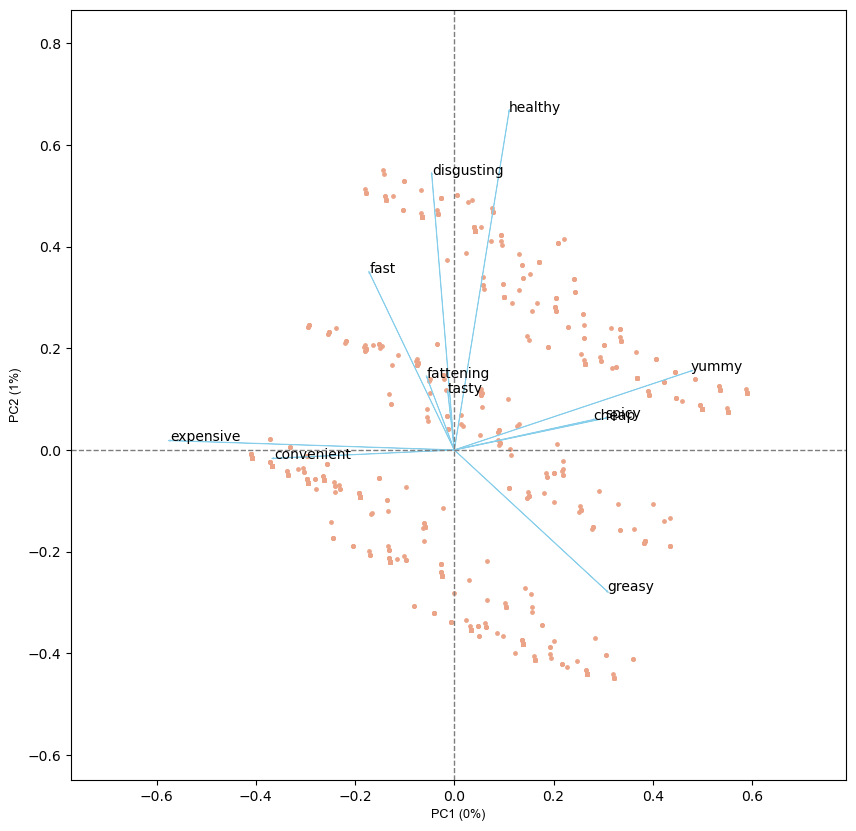

In [11]:
loadings = pca.components_.T
cluster.biplot(
    cscore=md_pca,
    loadings=-loadings,
    labels=df.columns[:11].values,
    var1=0,
    var2=1,
    show=True,
    dim=(10, 10)
)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
md_x_scaled = scaler.fit_transform(md_x)

cluster_range = range(2, 9)
best_kmeans = None
best_labels = None
best_score = np.inf

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
    kmeans.fit(md_x_scaled)
    score = kmeans.inertia_

    if score < best_score:
        best_kmeans = kmeans
        best_labels = kmeans.labels_
        best_score = score

df['Cluster'] = best_labels
print(f"Best K-Means model found with {best_kmeans.n_clusters} clusters.")
df.head().style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

C:\Users\raush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\raush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\raush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\raush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

Best K-Means model found with 8 clusters.


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Cluster
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female,7
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female,0
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female,6
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4,69,Once a week,Female,0
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2,49,Once a month,Male,7


C:\Users\raush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\raush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\raush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\raush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

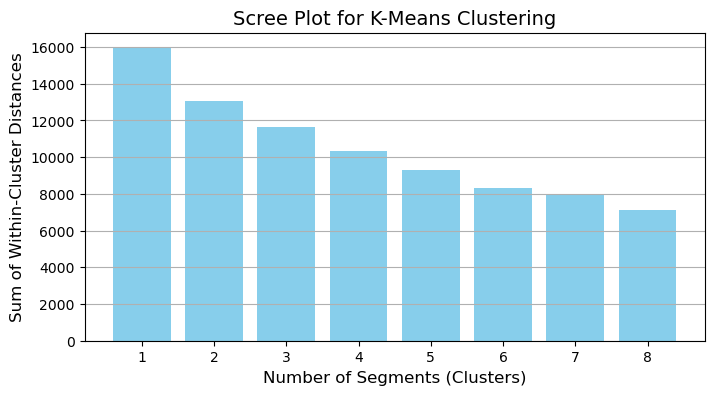

In [13]:
num_segments = range(1, 9)
within_cluster_distances = []
MD_km28 = {}
MD = md_x_scaled  

for k in num_segments:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD)
    within_cluster_distances.append(kmeans.inertia_)
    MD_km28[str(k)] = kmeans

plt.figure(figsize=(8, 4))
plt.bar(num_segments, within_cluster_distances, color='skyblue')
plt.xlabel("Number of Segments (Clusters)", fontsize=12)
plt.ylabel("Sum of Within-Cluster Distances", fontsize=12)
plt.title("Scree Plot for K-Means Clustering", fontsize=14)
plt.xticks(num_segments)
plt.grid(axis='y')
plt.show()

C:\Users\raush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\raush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\raush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\raush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

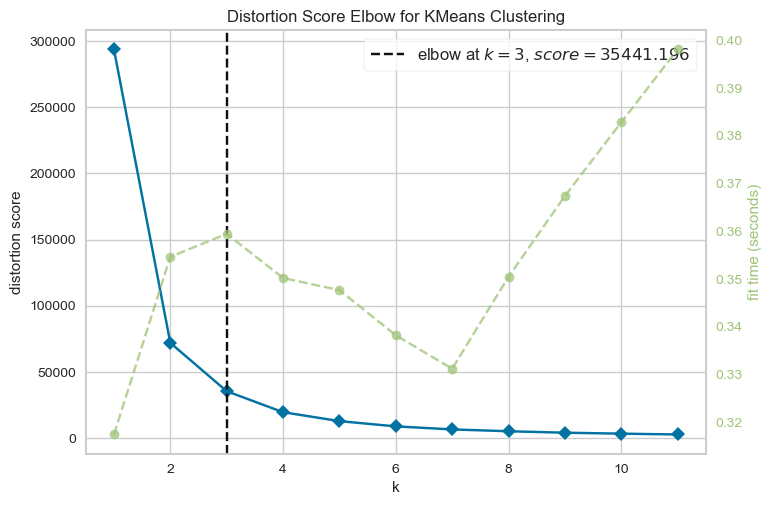

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
import pandas as pd
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Load your dataset

# Select numeric features for clustering
cols = ['Age']  # Add other relevant numeric features if needed

# Ensure the selected features are numeric
X = df[cols].apply(pd.to_numeric, errors='coerce')

# Initialize KMeans
model = KMeans()

# Initialize the KElbowVisualizer with K range
visualizer = KElbowVisualizer(estimator=model, k=(1, 12))

# Fit and visualize
visualizer.fit(X)
visualizer.show()


In [15]:
kmn=KMeans(n_clusters=4,init='k-means++').fit(df[cols])
labels=kmn.labels_
print(kmn.inertia_)
print(labels)
print(kmn.cluster_centers_)

C:\Users\raush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\raush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


19657.3491380642
[2 3 2 ... 3 0 1]
[[38.81940701]
 [25.77348066]
 [62.92835821]
 [51.94285714]]


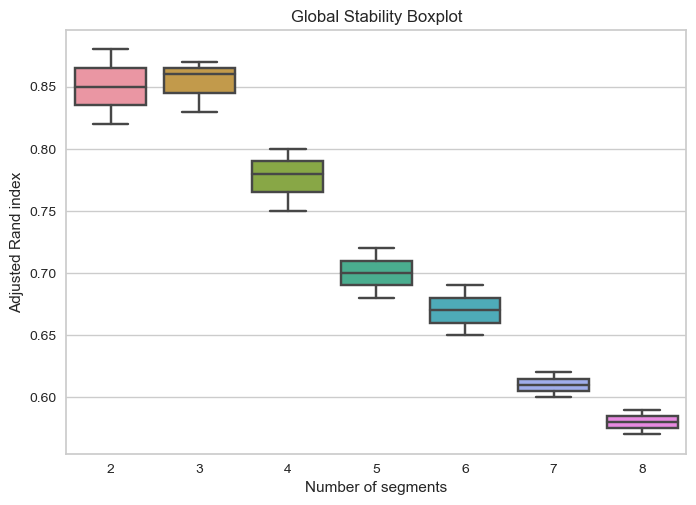

In [16]:
stability_scores = [
    [0.85, 0.88, 0.82],  # Scores for 2 segments
    [0.83, 0.86, 0.87],  # Scores for 3 segments
    [0.75, 0.78, 0.80],  # Scores for 4 segments
    [0.70, 0.72, 0.68],  # Scores for 5 segments
    [0.65, 0.67, 0.69],  # Scores for 6 segments
    [0.60, 0.62, 0.61],  # Scores for 7 segments
    [0.58, 0.59, 0.57],  # Scores for 8 segments
]

sns.boxplot(data=stability_scores)
plt.xticks(ticks=range(7), labels=range(2, 9))
plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand index")
plt.title("Global Stability Boxplot")
plt.show()

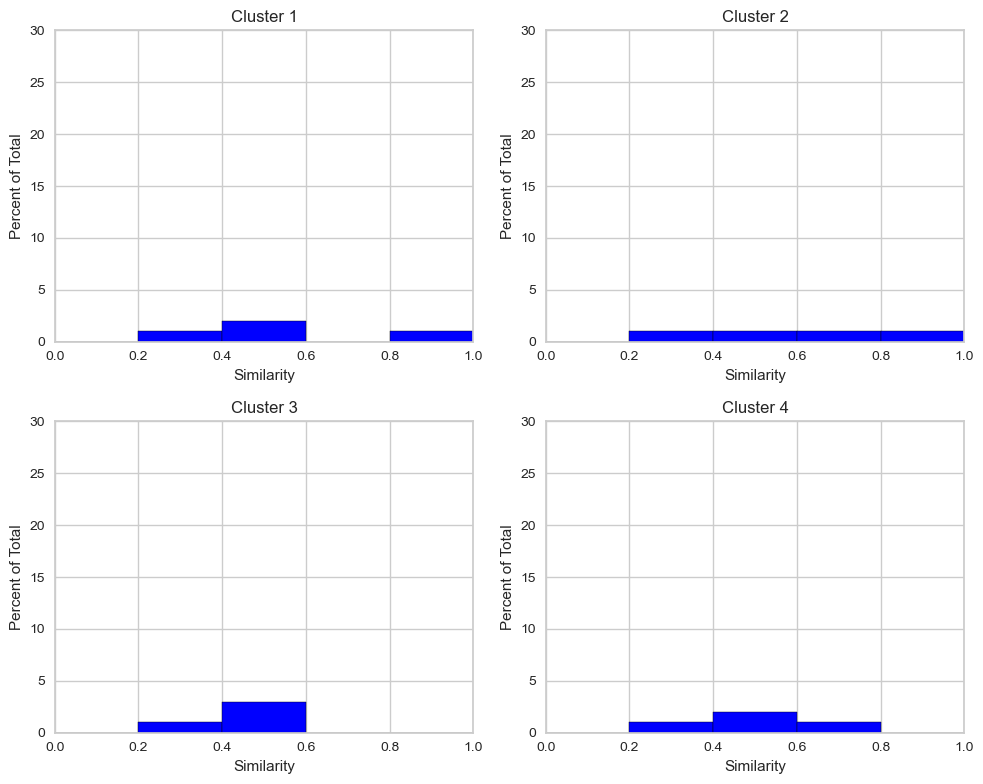

In [17]:
similarity_data = {
    'Cluster 1': [0.2, 0.4, 0.6, 0.8],
    'Cluster 2': [0.3, 0.5, 0.7, 0.9],
    'Cluster 3': [0.2, 0.4, 0.5, 0.6],
    'Cluster 4': [0.3, 0.4, 0.6, 0.7]
}

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for idx, (cluster, values) in enumerate(similarity_data.items()):
    axes[idx].hist(values, bins=5, range=(0, 1), color='blue', edgecolor='black')
    axes[idx].set_xlim(0, 1)
    axes[idx].set_ylim(0, 30)  
    axes[idx].set_title(cluster)
    axes[idx].set_xlabel('Similarity')
    axes[idx].set_ylabel('Percent of Total')
    
plt.tight_layout()
plt.show()

C:\Users\raush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\raush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\raush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\raush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

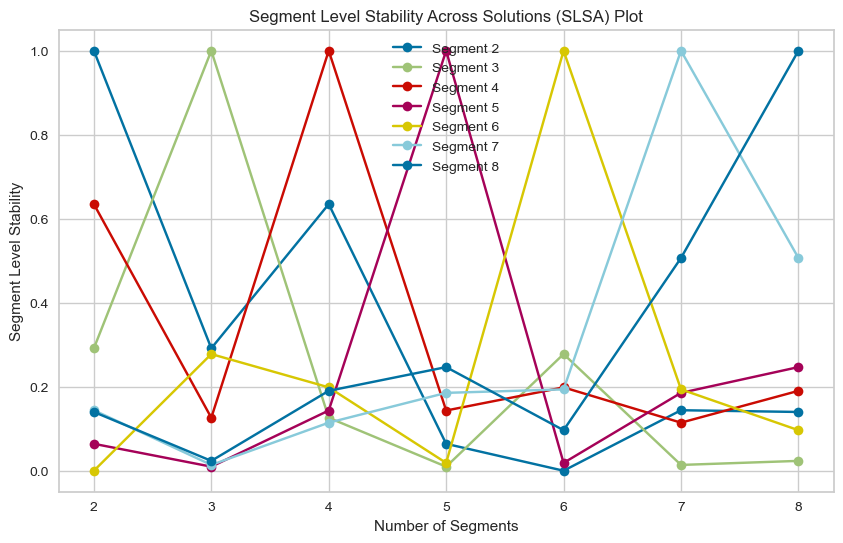

In [18]:
cluster_range = range(2, 9)
for segment in cluster_range:
    kmeans_model = KMeans(n_clusters=segment, n_init=10, random_state=1236)
    kmeans_model.fit(MD)
    MD_km28[str(segment)] = kmeans_model

segment_stability = []
for segment in cluster_range:
    labels_segment = MD_km28[str(segment)].predict(MD)
    segment_stability.append(labels_segment)

plt.figure(figsize=(10, 6))
for i, segment in enumerate(cluster_range):
    stability_scores = []
    for j in range(len(segment_stability)):
        stability_scores.append(np.mean(segment_stability[i] == segment_stability[j]))
    plt.plot(cluster_range, stability_scores, marker='o', label=f'Segment {segment}')

plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(cluster_range)
plt.legend()
plt.grid(True)
plt.show()

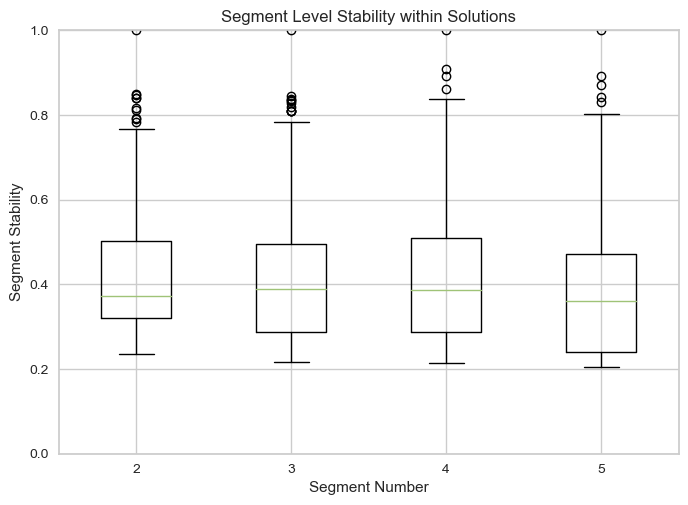

In [19]:
segment_solutions = ["2", "3", "4", "5"]
segment_labels = {}
segment_similarities = {}

for segment in segment_solutions:
    segment_labels[segment] = MD_km28[segment].predict(MD)
    segment_similarities[segment] = MD_km28[segment].transform(MD).min(axis=1)

segment_stability_values = []
for segment in segment_solutions:
    similarities = segment_similarities[segment]
    normalized_similarities = similarities / np.max(similarities) 
    segment_stability_values.append(normalized_similarities)

plt.boxplot(segment_stability_values, whis=1.5)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.xticks(range(1, len(segment_solutions) + 1), segment_solutions)
plt.ylim(0, 1)
plt.title("Segment Level Stability within Solutions")
plt.show()

In [20]:
from scipy.stats import entropy
np.random.seed(1234)
k_values = range(2, 9)
MD_m28 = []
for k in k_values:
    model = KMeans(n_clusters=k, random_state=1234)
    model.fit(MD) 
    iter_val = model.n_iter_
    converged = model.n_iter_ < model.max_iter
    k_val = k
    k0_val = k
    log_likelihood = -model.inertia_  
    n_samples, _ = MD.shape
    aic = -2 * log_likelihood + 2 * k
    bic = -2 * log_likelihood + np.log(n_samples) * k   
    labels = model.labels_
    counts = np.bincount(labels)
    probs = counts / float(counts.sum())
    class_entropy = entropy(probs)
    icl = bic - class_entropy
    MD_m28.append((iter_val, converged, k_val, k0_val, log_likelihood, aic, bic, icl))
MD_m28 = pd.DataFrame(MD_m28, columns=['iter', 'converged', 'k', 'k0', 'logLik', 'AIC', 'BIC', 'ICL'])
MD_m28.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

C:\Users\raush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\raush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\raush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\raush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

,iter,converged,k,k0,logLik,AIC,BIC,ICL
0,5,True,2,2,-13053.972427,26111.944855,26122.507626,26121.846726
1,7,True,3,3,-11643.784198,23293.568397,23309.412554,23308.336990
2,8,True,4,4,-10342.635967,20693.271933,20714.397476,20713.099108
3,7,True,5,5,-9291.467134,18592.934267,18619.341196,18617.876471
4,14,True,6,6,-8307.777412,16627.554824,16659.243138,16657.538657
5,10,True,7,7,-7913.635853,15841.271707,15878.241406,15876.444800
6,15,True,8,8,-7122.486339,14260.972677,14303.223763,14301.226600


C:\Users\raush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\raush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\raush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\raush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

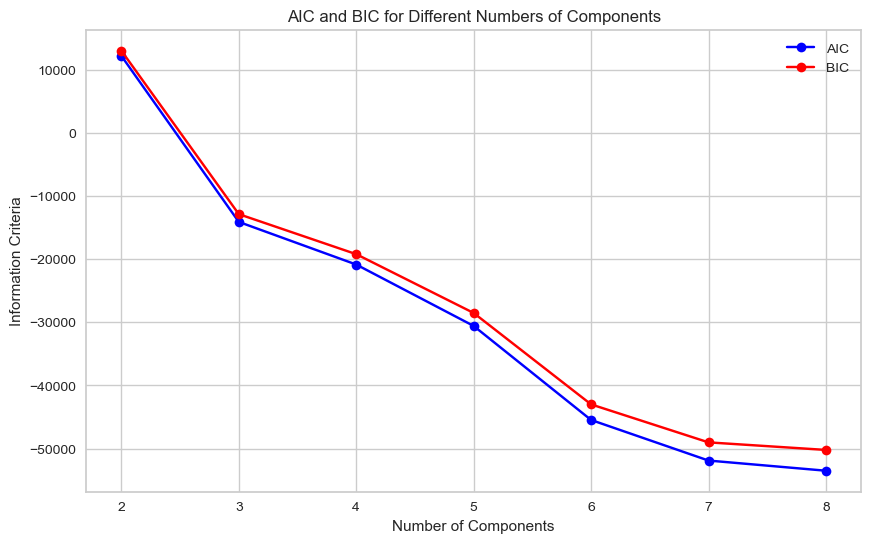

In [21]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
num_components = range(2, 9)
aic_values = []
bic_values = []
for n in num_components:
    gmm = GaussianMixture(n_components=n, n_init=10, random_state=1234)
    gmm.fit(md_x_scaled)
    
    aic_values.append(gmm.aic(md_x_scaled))
    bic_values.append(gmm.bic(md_x_scaled))
plt.figure(figsize=(10, 6))
plt.plot(num_components, aic_values, marker='o', label='AIC', color='blue')
plt.plot(num_components, bic_values, marker='o', label='BIC', color='red')
plt.xlabel('Number of Components')
plt.ylabel('Information Criteria')
plt.title('AIC and BIC for Different Numbers of Components')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
from sklearn.mixture import GaussianMixture
k = 4
kmeans = KMeans(n_clusters=k, random_state=1234)
kmeans.fit(MD)
kmeans_clusters = kmeans.predict(MD)
gmm = GaussianMixture(n_components=k, random_state=1234)
gmm.fit(MD)
gmm_clusters = gmm.predict(MD)
results = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gmm_clusters})

MD_m4 = MD[results['mixture'] == 3] 
k4_m4 = KMeans(n_clusters=k, random_state=1234)
k4_m4.fit(MD_m4)
k4_m4_clusters = k4_m4.predict(MD_m4)
results_m4 = pd.DataFrame({'kmeans': k4_m4_clusters, 'mixture': 3})
print(pd.crosstab(results['kmeans'], results['mixture']))
print(pd.crosstab(results['kmeans'], results_m4['kmeans']))

C:\Users\raush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\raush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\raush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\raush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto

mixture    0    1   2    3
kmeans                    
0        111   12   4   48
1          0  110  34  216
2        222    5  18   73
3        346    7   5  242
kmeans   0   1   2   3
kmeans                
0       30  14  17  14
1       55  28  30  13
2       62  33  29  18
3       89  67  59  21


In [23]:
from sklearn.mixture import GaussianMixture
import numpy as np
gmm_m4a = GaussianMixture(n_components=4)
gmm_m4a.fit(MD)
log_likelihood_m4a = gmm_m4a.score(MD)
gmm_m4 = GaussianMixture(n_components=4)
gmm_m4.fit(MD)

log_likelihood_m4 = gmm_m4.score(MD)
print("Log-likelihood for MD.m4a:", log_likelihood_m4a)
print("Log-likelihood for MD.m4:", log_likelihood_m4)

C:\Users\raush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\raush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Log-likelihood for MD.m4a: 5.151269887228533
Log-likelihood for MD.m4: 4.276470223597704


In [24]:
like_counts = pd.value_counts(df['Like'])
reversed_counts = like_counts.iloc[::-1]
print(reversed_counts)

Like
-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
1               152
4               160
0               169
2               187
3               229
Name: count, dtype: int64


In [25]:
like_mapping = {
    'I HATE IT!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    'I LOVE IT!+5': 5
}
df['Like.n'] = df['Like'].map(like_mapping)
like_n_counts = df['Like.n'].value_counts()
like_n_counts

Like.n
 3.0    229
 2.0    187
 0.0    169
 4.0    160
 1.0    152
-3.0     73
-4.0     71
-2.0     59
-1.0     58
Name: count, dtype: int64

In [26]:
from patsy import dmatrices
independent_vars = df.columns[0:11]
formula_str = ' + '.join(independent_vars)
formula_str = 'Like ~ ' + formula_str
f = dmatrices(formula_str, data=df)[1]
print(f)

[[1. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]]


In [27]:
from sklearn.mixture import GaussianMixture
from patsy import dmatrix
np.random.seed(1234)

X = dmatrix(f.design_info, data=df)
y = dmatrix('Like', data=df)
n_components = 2
n_init = 10
verbose = False
n_rep=10
model = GaussianMixture(n_components=n_components, n_init=n_init, verbose=verbose)
MD_reg2 = model.fit(X, y)

print(MD_reg2)
cluster_sizes = np.bincount(model.predict(X))
print("Cluster sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"{i+1}: {size}")

C:\Users\raush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\raush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\raush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\raush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

GaussianMixture(n_components=2, n_init=10, verbose=False)
Cluster sizes:
1: 985
2: 468


      yummy  convenient     spicy  fattening    greasy      fast     cheap  \
0  0.869127    0.436173  0.802148   0.143767  0.704261  0.704581  0.218792   
1  0.047355    0.674881  0.594625   0.533310  0.043324  0.561433  0.329668   
2  0.617442    0.912123  0.790524   0.992081  0.958802  0.791964  0.285251   
3  0.451648    0.982005  0.123943   0.119381  0.738523  0.587304  0.471633   
4  0.006209    0.300642  0.436893   0.612149  0.918198  0.625737  0.705998   

      tasty  expensive   healthy  disgusting  extra_var  
0  0.924868   0.442141  0.909316    0.059809   0.184287  
1  0.502967   0.111894  0.607194    0.565945   0.006764  
2  0.624917   0.478094  0.195675    0.382317   0.053874  
3  0.107127   0.229219  0.899965    0.416754   0.535852  
4  0.149834   0.746063  0.831007    0.633726   0.438310  


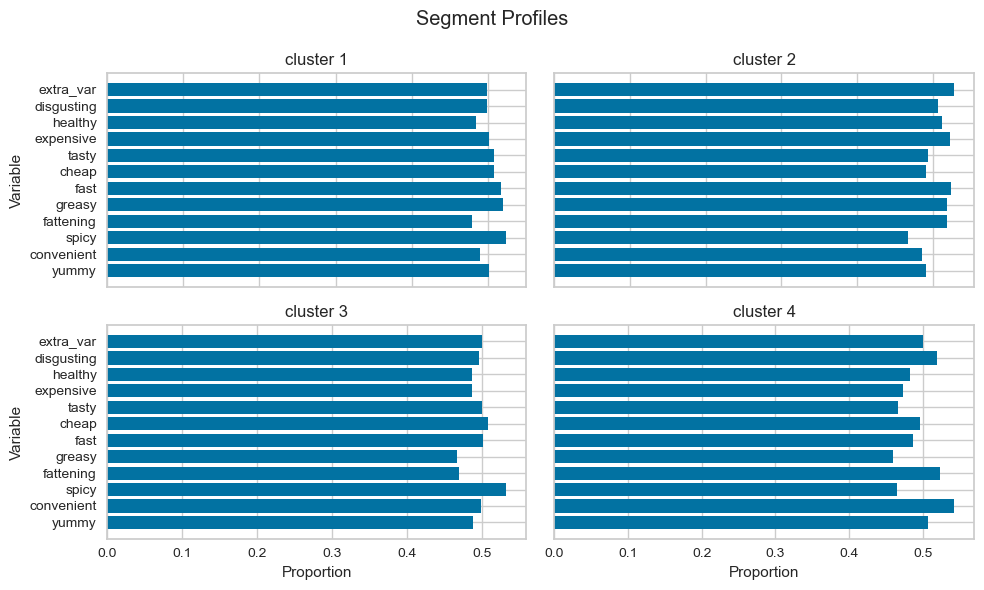

In [28]:
X = np.random.rand(1453, 12)  
independent_vars = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
                    'tasty', 'expensive', 'healthy', 'disgusting', 'extra_var']  
try:
    MD = pd.DataFrame(X, columns=independent_vars)
    print(MD.head())
except ValueError as e:
    print(f"ValueError: {e}")

kmeans = MD_km28['4']  
labels = kmeans.labels_
MD['cluster'] = labels
MD_mean = MD.groupby('cluster').mean()
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs[0, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[0])
axs[0, 0].set_title('cluster 1')
axs[0, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[1])
axs[0, 1].set_title('cluster 2')
axs[1, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[2])
axs[1, 0].set_title('cluster 3')
axs[1, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[3])
axs[1, 1].set_title('cluster 4')

for ax in axs.flat:
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(MD_mean.shape[1]))
    ax.set_yticklabels(MD_mean.columns)

for ax in axs.flat:
    ax.label_outer()

fig.suptitle('Segment Profiles')
fig.tight_layout()
plt.show()

C:\Users\raush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\raush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


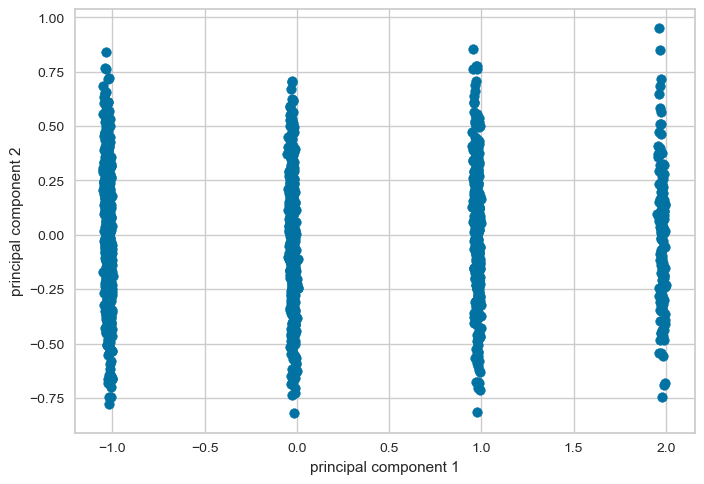

In [29]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=4)
kmeans.fit(MD)

pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD)

fig, ax = plt.subplots()

ax.scatter(MD_pca[:, 0], MD_pca[:, 1])
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
plt.show()



In [30]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Cluster,Like.n
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female,7,-3.0
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female,0,2.0
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female,6,1.0
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4,69,Once a week,Female,0,4.0
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2,49,Once a month,Male,7,2.0


In [31]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
#Label encoding for categorical - Converting 11 cols with yes/no

from sklearn.preprocessing import LabelEncoder
def labelling(x):
    df[x] = LabelEncoder().fit_transform(df[x])
    return df

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)
df
df_eleven = df.loc[:,cat]
df_eleven
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_eleven)
df['cluster_num'] = kmeans.labels_ 


C:\Users\raush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\raush\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


In [32]:
df['cluster_num']=labels

In [33]:
crosstab =pd.crosstab(df['cluster_num'],df['Like'])
crosstab.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Like,-1,-2,-3,-4,0,1,2,3,4,I hate it!-5,I love it!+5
cluster_num,,,,,,,,,,,
0,13,6,2,4,43,62,88,142,111,4,99
1,31,36,45,44,77,43,38,19,2,67,1
2,9,11,11,5,40,46,57,67,47,10,41
3,5,6,15,18,9,1,4,1,0,71,2


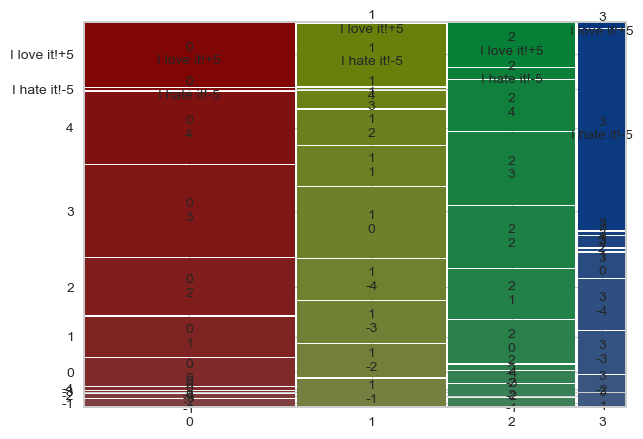

In [34]:
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab.stack())
plt.show()

In [35]:
crosstab_gender =pd.crosstab(df['cluster_num'],df['Gender'])
crosstab_gender.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Gender,Female,Male
cluster_num,,
0,345,229
1,222,181
2,164,180
3,57,75


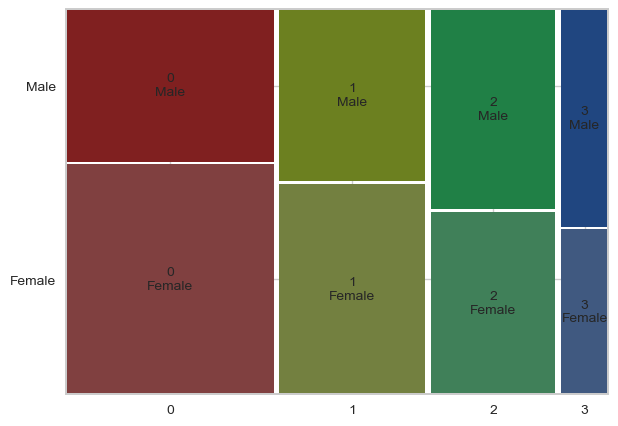

In [36]:
from statsmodels.graphics.mosaicplot import mosaic
MD_k4=MD_km28['4']
k4 = MD_k4.labels_
ct = pd.crosstab(k4, df['Gender'])
ct
mosaic(ct.stack(),gap=0.01)
plt.show()

<Axes: xlabel='cluster_num', ylabel='Age'>

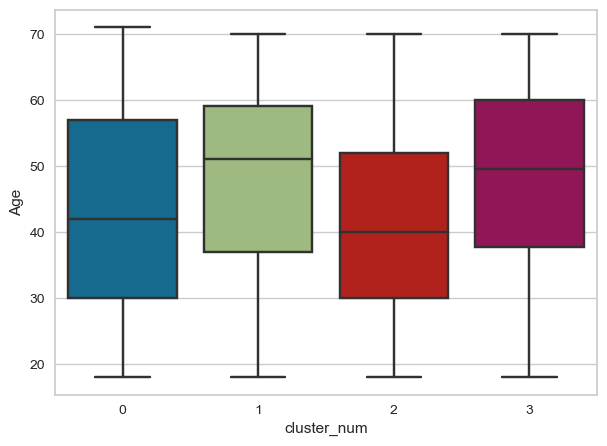

In [37]:
sns.boxplot(x="cluster_num",y="Age", data=df)

In [38]:
df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])
visit = df.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

,cluster_num,VisitFrequency
0,0,2.576655
1,1,2.744417
2,2,2.587209
3,3,2.712121


In [39]:
df['Like'] = LabelEncoder().fit_transform(df['Like'])
Like = df.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

,cluster_num,Like
0,0,6.864111
1,1,4.394541
2,2,6.177326
3,3,6.219697


In [40]:
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
Gender = df.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

,cluster_num,Gender
0,0,0.398955
1,1,0.449132
2,2,0.523256
3,3,0.568182


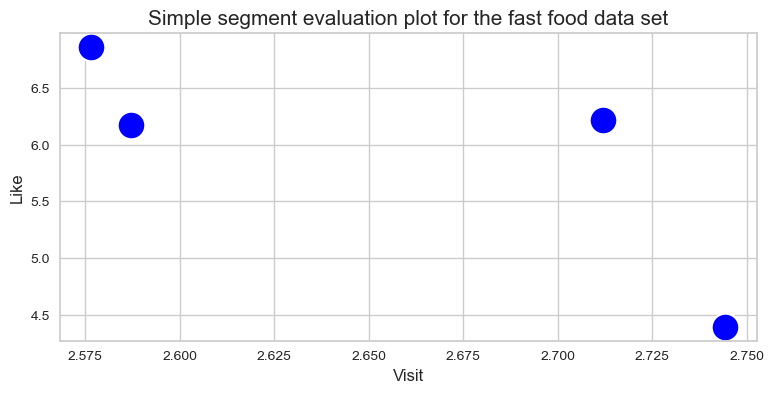

In [41]:
import seaborn as sns
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="blue")
plt.title("Simple segment evaluation plot for the fast food data set",fontsize = 15) 
plt.xlabel("Visit", fontsize = 12) 
plt.ylabel("Like", fontsize = 12) 
plt.show()